In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../../scripts")
from LSTM import PortfolioPredicitionsLSTM_volatility
from LSTM_utils import compute_errors_volatility

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../../data/BRK-B.csv"),
          "Google": pd.read_csv("../../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../../data/MSFT.csv"),
          "Exxon": pd.read_csv("../../data/XOM.csv")}

# Modélisation

In [3]:
LSTM = PortfolioPredicitionsLSTM_volatility(titres, 
                                            n_steps = 30, 
                                            epochs = 50, 
                                            horizon_prev = 7, 
                                            test_size = 0.8)

In [4]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

100%|██████████| 5/5 [06:32<00:00, 78.49s/it]


# Split

In [5]:
stock = titres["Amazon"]

stock.Date = pd.to_datetime(stock["Date"])

stock["ret"] = stock['Close'].pct_change()
stock.dropna(inplace=True)

stock["volatility"] = stock['ret'].rolling(window=10).std()
stock.dropna(inplace=True)

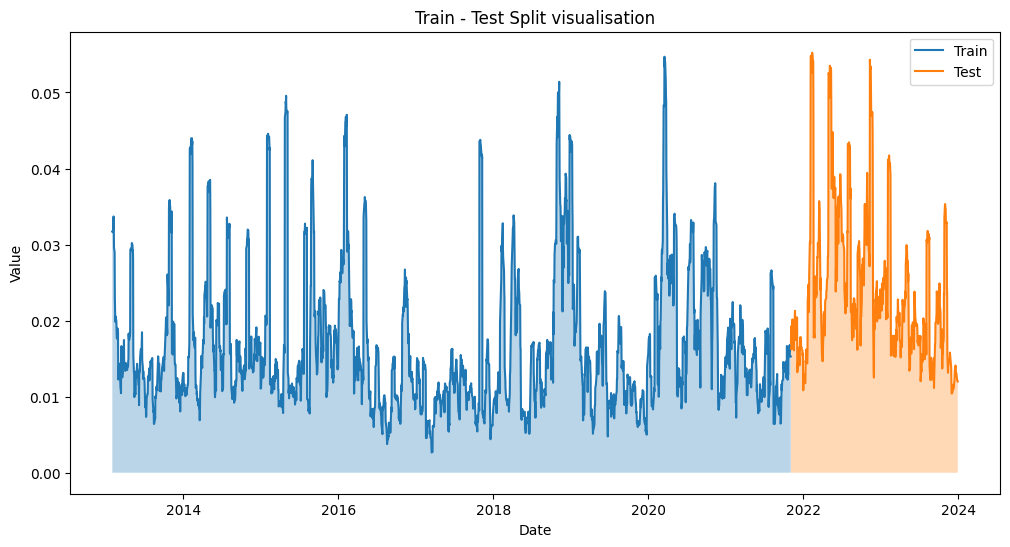

In [6]:
fig = plt.figure(figsize=(12, 6))

plt.plot(stock.Date.iloc[:LSTM.split], stock['volatility'].iloc[:LSTM.split], label='Train')
plt.fill_between(stock.Date.iloc[:LSTM.split], stock['volatility'].iloc[:LSTM.split], alpha=0.3)

plt.plot(stock.Date.iloc[LSTM.split:], stock['volatility'].iloc[LSTM.split:], label='Test')
plt.fill_between(stock.Date.iloc[LSTM.split:], stock['volatility'].iloc[LSTM.split:], alpha=0.3)

plt.title(f"Train - Test Split visualisation")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Résultats

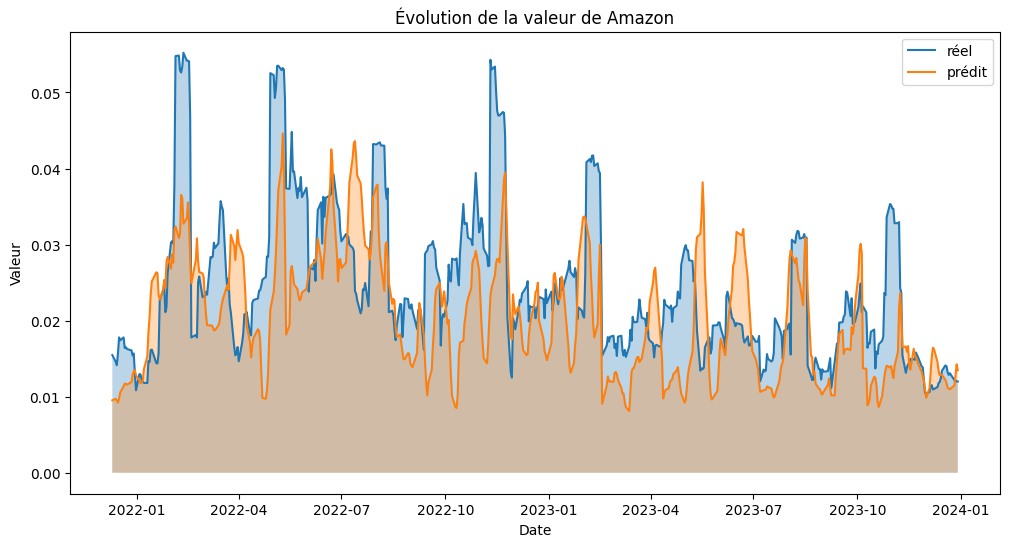

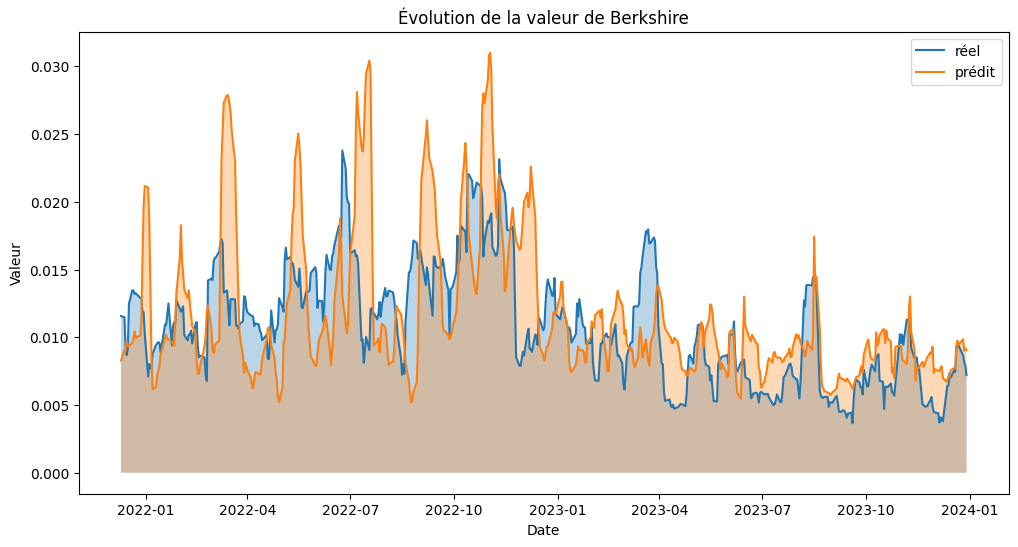

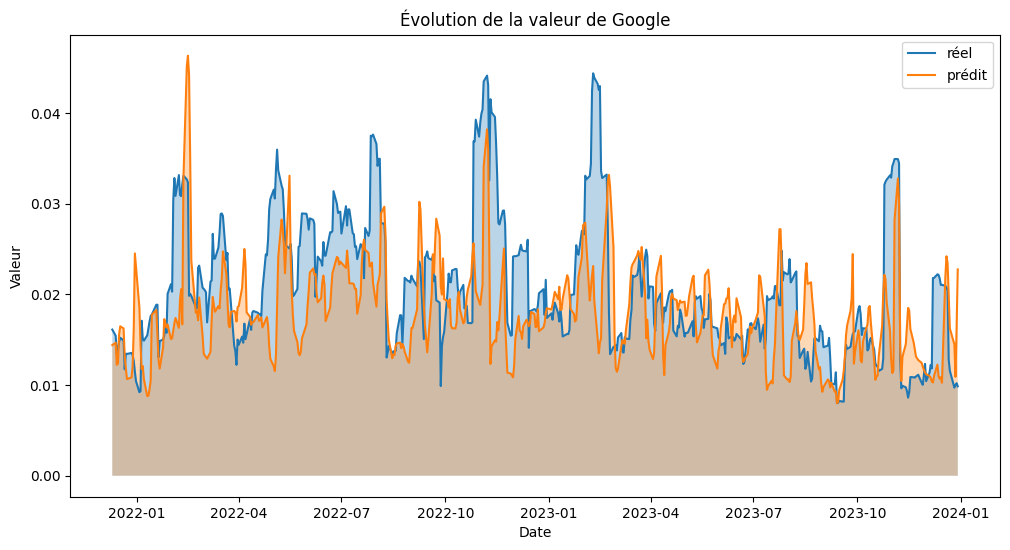

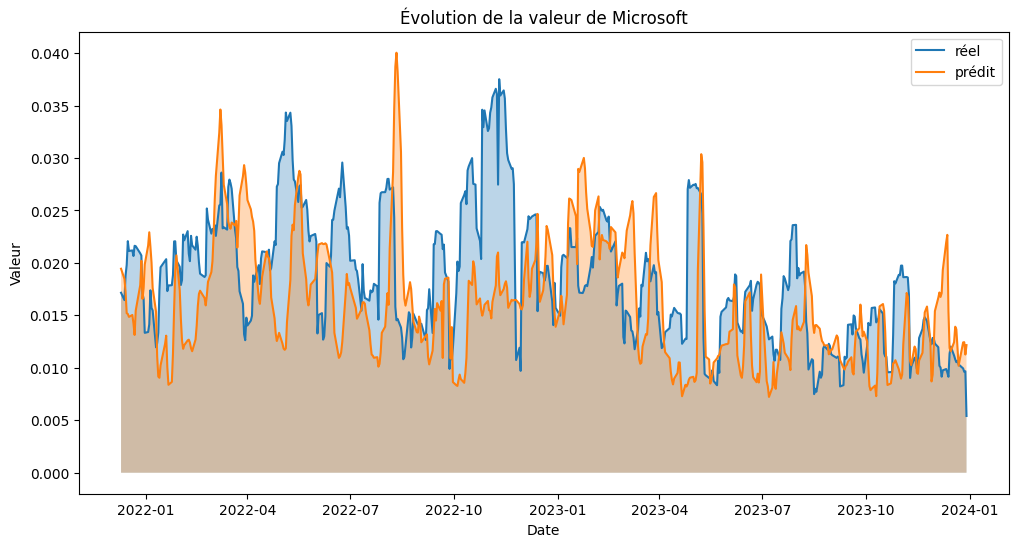

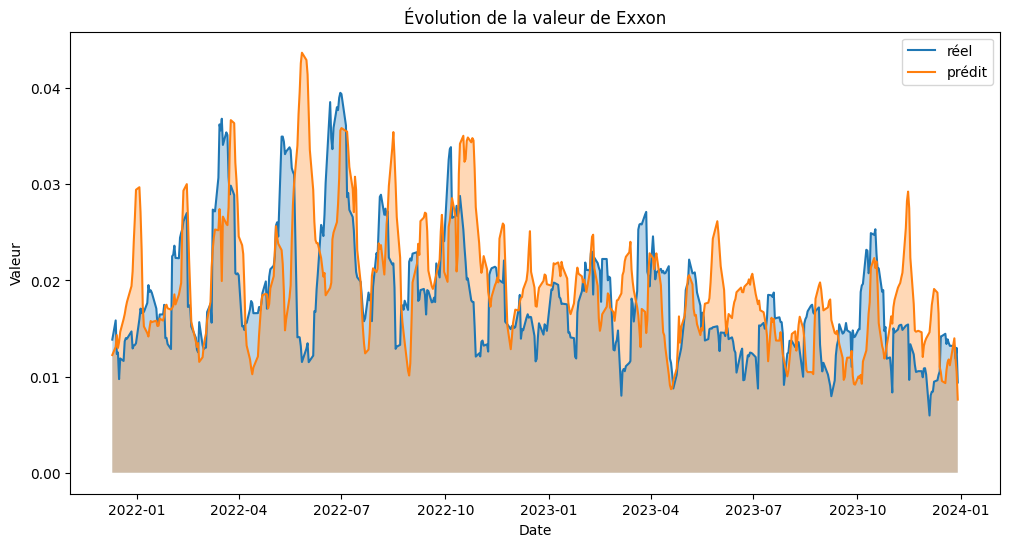

In [7]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    plt.plot(value.Date, value['Volatility'], label='réel')
    plt.fill_between(value.Date, value['Volatility'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

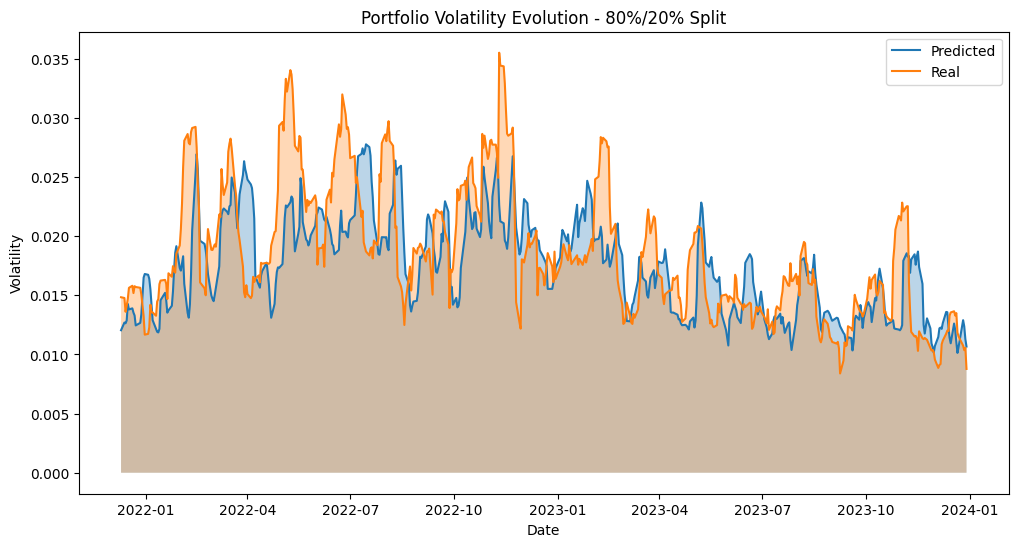

In [6]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Prediction'], label='Predicted')
plt.fill_between(ptf_avg.Date, ptf_avg['Prediction'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Volatility'], label='Real')
plt.fill_between(ptf_avg.Date, ptf_avg['Volatility'], alpha=0.3)

plt.title(f"Portfolio Volatility Evolution - 80%/20% Split")
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

# Erreurs

In [9]:
errors = compute_errors_volatility(predictions, ptf_avg)

In [10]:
errors

,MSE,RMSE,MAE
Portfolio,0.000020,0.004488,0.003382
Amazon,0.000097,0.009832,0.007615
Berkshire,0.000027,0.005193,0.003853
Google,0.000062,0.007859,0.005721
Microsoft,0.000061,0.007820,0.006011
Exxon,0.000051,0.007170,0.005290
